<a href="https://colab.research.google.com/github/nick-leland/HFT-8-Hour-Dive/blob/main/Stock_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Writing the function to convert into systematic data

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
def plot_series(series, title=None):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(series)
    plt.xlabel("Index")
    plt.ylabel("Value")
    if title:
        plt.title(title)
    else:
        plt.title("Time Series Plot")
    plt.grid(True)
    plt.show()

def adjust_price_series(df, jump_threshold=20, price_column='Typical Price'):
    previous = None
    adjustment = 0
    adjusted_ts = []

    for point in df[price_column]:
        if previous is not None:
            difference = abs(point - previous)

            if difference > jump_threshold:
                if point > previous:
                    adjustment -= difference
                else:
                    adjustment += difference

        previous = point
        adjusted_ts.append(point + adjustment)

    return adjusted_ts


def adjusted_portion(dataframe_input, plot=False, adjusted_price=True):
    input = dataframe_input.copy()
    name = input.iloc[0].iloc[0]

    input.drop(0, inplace=True)
    input.drop(1, inplace=True)

    input.drop('Price', axis=1, inplace=True)
    input = input.reset_index(drop=True)

    input['High'] = input['High'].astype(float)
    input['Low'] = input['High'].astype(float)
    input['Close'] = input['High'].astype(float)

    input['Typical Price'] = ((input['High']) + (input['Low']) + (input['Close'])) / 3
    output = input['Typical Price']

    # Plot the
    if plot:
        plot_series(output, title="Time Series Plot")

    if adjusted_price:
        output = adjust_price_series(input)
        output = pd.Series(output)
        plot_series(output, title="Time Series Plot Adjusted")

    output.to_csv('TSLA_TS.csv', index=False, index_label=False, header=False)
    return output


In [149]:
df = pd.read_csv("/content/TSLA.csv")

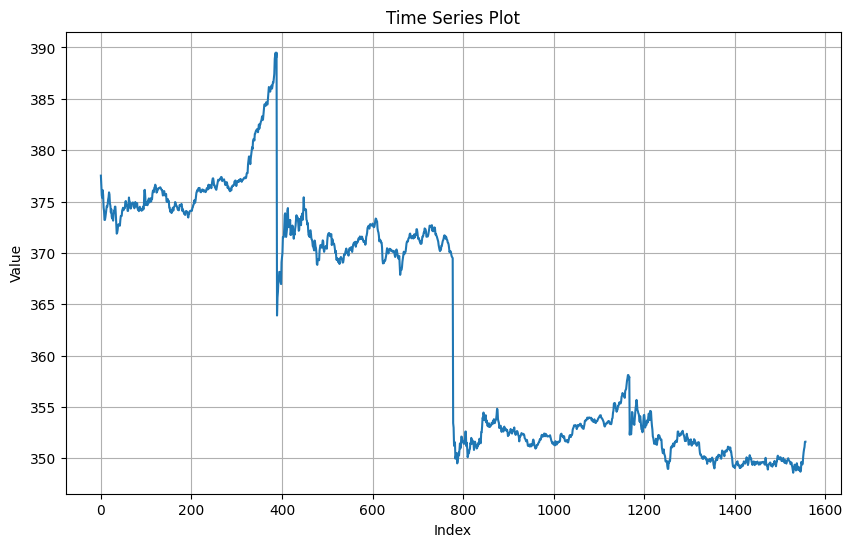

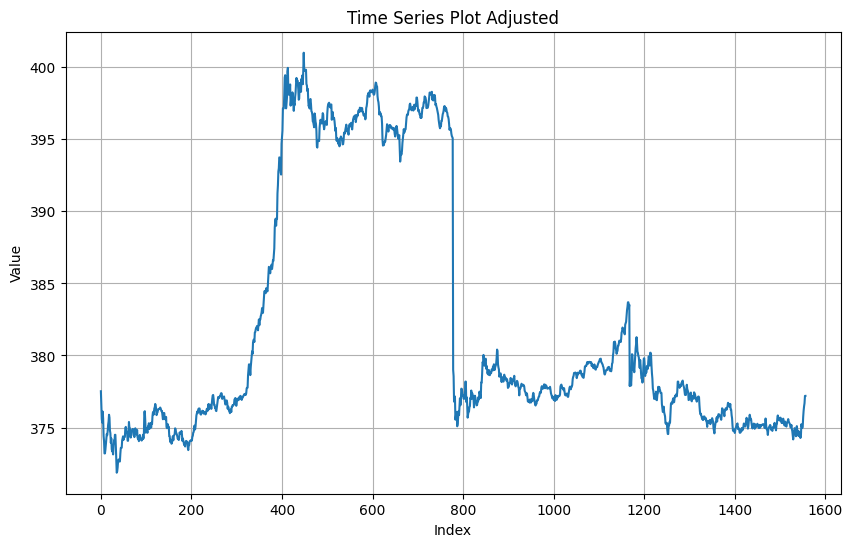

In [150]:
df = adjusted_portion(df, plot=True)

In [133]:
df.head()

,0
0,880.879974
1,878.639994
2,876.376444
3,875.793325
4,877.589966


In [137]:
df2 = pd.read_csv("/content/TSLA.csv")
df2.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-06 14:30:00+00:00,376.0199890136719,376.0199890136719,377.5199890136719,375.70001220703125,377.2699890136719,5053151
3,2024-12-06 14:31:00+00:00,375.6000061035156,375.6000061035156,376.55999755859375,374.5201110839844,376.04998779296875,876874
4,2024-12-06 14:32:00+00:00,374.3399963378906,374.3399963378906,375.58990478515625,374.1449890136719,375.5400085449219,529576


# Outdated

In [116]:
adjustment(df)

KeyError: 'Typical Price'

In [210]:
df = pd.read_csv("/content/TSLA.csv")

In [211]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-06 14:30:00+00:00,376.0199890136719,376.0199890136719,377.5199890136719,375.70001220703125,377.2699890136719,5053151
3,2024-12-06 14:31:00+00:00,375.6000061035156,375.6000061035156,376.55999755859375,374.5201110839844,376.04998779296875,876874
4,2024-12-06 14:32:00+00:00,374.3399963378906,374.3399963378906,375.58990478515625,374.1449890136719,375.5400085449219,529576


In [212]:
df.drop(0,  inplace=True)
df.drop(1,  inplace=True)

In [213]:
df = df.reset_index(drop=True)

In [214]:
df.drop('Price', axis=1, inplace=True)

In [215]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
0,376.0199890136719,376.0199890136719,377.5199890136719,375.70001220703125,377.2699890136719,5053151
1,375.6000061035156,375.6000061035156,376.55999755859375,374.5201110839844,376.04998779296875,876874
2,374.3399963378906,374.3399963378906,375.58990478515625,374.1449890136719,375.5400085449219,529576
3,374.7799987792969,374.7799987792969,375.3399963378906,374.2300109863281,374.3550109863281,476375
4,375.27081298828125,375.27081298828125,376.1099853515625,374.3299865722656,374.6199951171875,547476


In [216]:
df['High'] = df['High'].astype(float)
df['Low'] = df['High'].astype(float)
df['Close'] = df['High'].astype(float)

df['Typical Price'] = ((df['High']) + (df['Low']) + (df['Close'])) / 3
time_series = df['Typical Price']

In [217]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Typical Price
0,376.0199890136719,377.519989,377.519989,377.519989,377.2699890136719,5053151,377.519989
1,375.6000061035156,376.559998,376.559998,376.559998,376.04998779296875,876874,376.559998
2,374.3399963378906,375.589905,375.589905,375.589905,375.5400085449219,529576,375.589905
3,374.7799987792969,375.339996,375.339996,375.339996,374.3550109863281,476375,375.339996
4,375.27081298828125,376.109985,376.109985,376.109985,374.6199951171875,547476,376.109985


In [218]:
df['Typical Price'].to_csv('TSLA_TS.csv', index=False, index_label=False, header=False)

In [219]:
df['Typical Price']

,Typical Price
0,377.519989
1,376.559998
2,375.589905
3,375.339996
4,376.109985
...,...
1552,350.575287
1553,350.880005
1554,351.100006
1555,351.609985


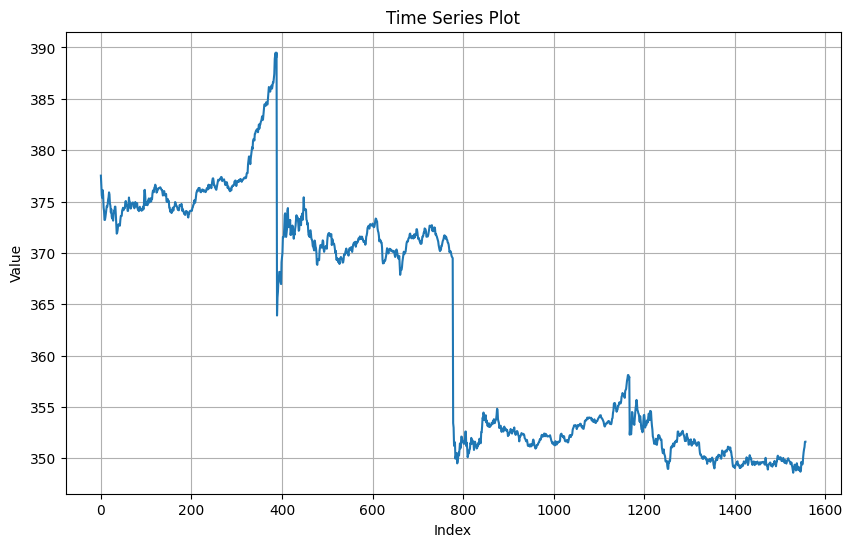

In [220]:
def plot_series(series):
  """Plots a given pandas Series using matplotlib.

  Args:
    series: A pandas Series object containing the data to plot.
  """
  plt.figure(figsize=(10, 6))  # Adjust figure size as needed
  plt.plot(series)
  plt.xlabel("Index")
  plt.ylabel("Value")
  plt.title("Time Series Plot")
  plt.grid(True)
  plt.show()

# Example usage (assuming 'df' and 'time_series' are defined as in your previous code):
plot_series(df['Typical Price'])

In [221]:
def adjustment(input_series):
    previous = None
    adjustment = 0
    adjusted_ts = []

    for point in input_series:
        if previous is None:
            pass

        else:
            difference = abs(point - previous)
            # Jump from day to day
            if difference > 5:
                if point > previous:
                    adjustment -= difference
                else:
                    adjustment += difference

        previous = point
        adjusted_ts.append(point + adjustment)
        plot_series(adjusted_ts)

    return adjusted_ts

In [222]:
adjustment(df)

TypeError: can only concatenate str (not "int") to str

In [226]:
previous = None
adjustment = 0
adjusted_ts = []

for point in df['Typical Price']:
    if previous is None:
        # Handle the first point
        adjusted_ts.append(point)
        previous = point
        continue

    difference = abs(point - previous)

    # If we detect a large jump
    if difference > 15

        print(difference)
        if point > previous:
            # If the point jumped up, we need to shift down
            adjustment -= difference
        else:
            # If the point jumped down, we need to shift up
            adjustment += difference

    # Add the adjusted point
    adjusted_ts.append(point + adjustment)
    previous = point  # Store the original (unadjusted) point as previous

25.589996337890625
16.069976806640625


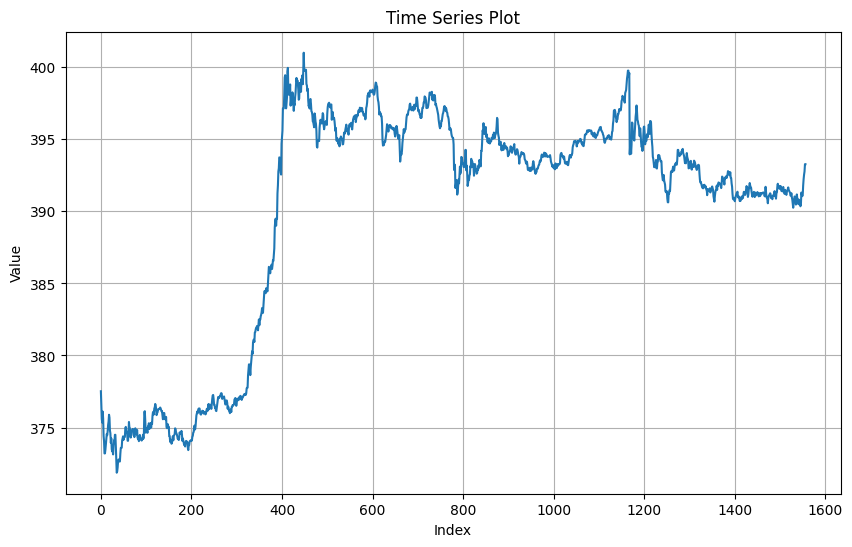

In [227]:
s = pd.Series(adjusted_ts)
plot_series(s)

In [208]:
previous = None
adjustment = 0
adjusted_ts = []

for point in df['Typical Price']:
    if previous is None:
        pass

    else:
        difference = abs(point - previous)

        # Jump from day to day
        # if difference > 5:
        #     print(difference)
        if difference > 20:
            if point > previous:
                adjustment = -difference
            else:
                adjustment = difference

        # Value is the same

    previous = point
    adjusted_ts.append(point + adjustment)